<a href="https://colab.research.google.com/github/YashNigam65/gitfolder/blob/master/assignment_3_pima_indians_nural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

write a python program to draw the neural network for the the pima indians diabetes prediction problem which was discussed in the class

In [10]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [16]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("https://raw.githubusercontent.com/YashNigam65/gitfolder/refs/heads/master/dataset/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
display(dataset)
X = dataset[:,0:8]
Y = dataset[:,8]

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [12]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6555 - loss: 19.7880
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5665 - loss: 6.7685
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5626 - loss: 2.9195
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 1.4373
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6399 - loss: 0.9375
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 0.8124
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - loss: 0.8156
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - loss: 0.8308
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - loss: 0.6974
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6695 - loss: 0.7073
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.7000
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [6]:
import numpy as np
# Predict diabetes for new samples (3 new patients)
samples = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],   # Sample 1
                    [1, 85, 66, 29, 0, 26.6, 0.351, 31],    # Sample 2
                    [8, 183, 64, 0, 0, 23.3, 0.672, 32]])   # Sample 3


In [7]:
# Predict diabetes (returns probabilities)
predictions = model.predict(samples)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Output predictions
print("Predictions for the samples (0 = No Diabetes, 1 = Diabetes):")
print(predicted_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predictions for the samples (0 = No Diabetes, 1 = Diabetes):
[1 0 1]


Neural network diagram saved as neural_network.png


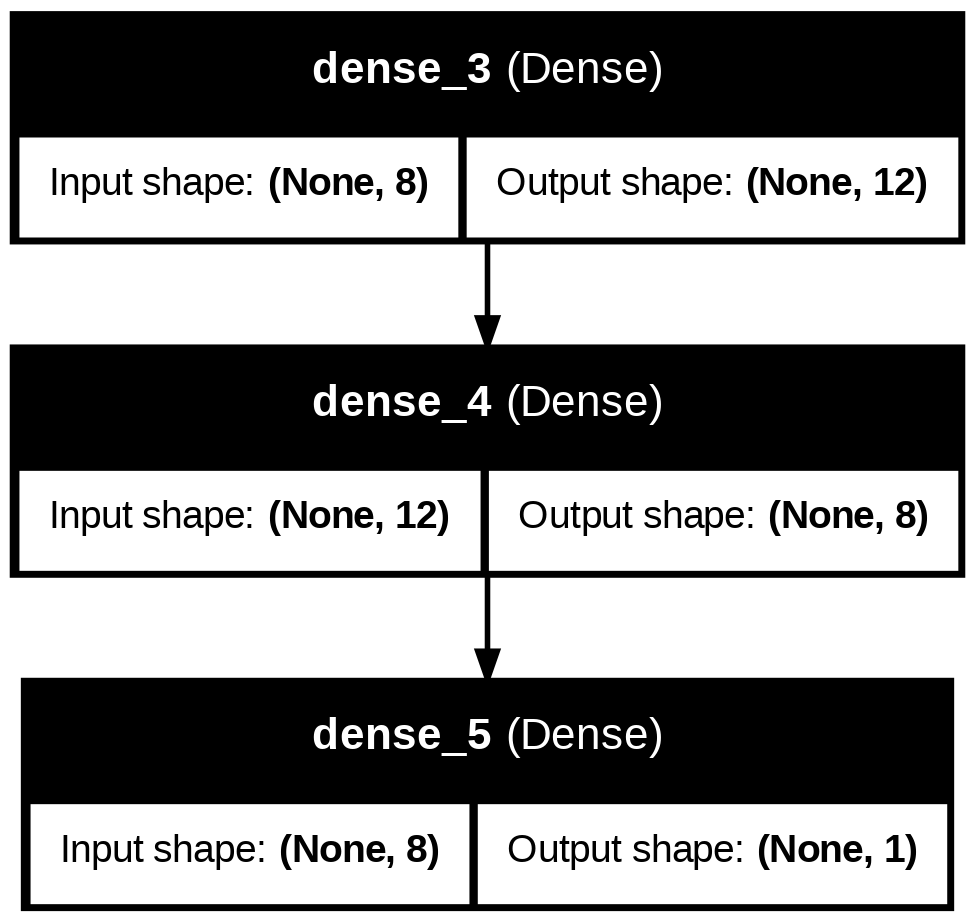

In [15]:
# Install libraries for plotting if you haven't already
!pip install visualkeras tensorflow graphviz

# Import plot_model (choose one based on your Keras/TensorFlow version)
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
# import visualkeras # Commenting out visualkeras as it's causing an error
from IPython.display import Image, display

# Visualize the model using visualkeras
# This will display a plot of the network architecture
# visualkeras.layered_view(model, legend=True).show() # Commenting out the visualkeras call

# Alternatively, you can save a plot to a file using plot_model
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)
print("Neural network diagram saved as neural_network.png")

# Display the saved image
display(Image(filename='neural_network.png'))